In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño
#!pip install gapminder

In [4]:
"""#ejemplo de la clase 6 para tener en cuenta 
datos = sns.load_dataset('tips')

(
    so.Plot(data=datos, x='total_bill', y='tip')
    .add(so.Dot())
    .add(so.Line(color='red', linewidth=3), so.PolyFit(1), label='Regresion lineal')    # Agregamos una etiqueta para la leyenda del grafico
    .label(title='Datos de propinas', x='Precio de la comida', y='Propina')    # Agregamos la leyenda, un titulo y le cambiamos el nombre a los ejes
)"""

"#ejemplo de la clase 6 para tener en cuenta \ndatos = sns.load_dataset('tips')\n\n(\n    so.Plot(data=datos, x='total_bill', y='tip')\n    .add(so.Dot())\n    .add(so.Line(color='red', linewidth=3), so.PolyFit(1), label='Regresion lineal')    # Agregamos una etiqueta para la leyenda del grafico\n    .label(title='Datos de propinas', x='Precio de la comida', y='Propina')    # Agregamos la leyenda, un titulo y le cambiamos el nombre a los ejes\n)"

In [5]:
"""
#extraido de la clase 6 
modelo = linear_model.LinearRegression()    # Inicializamos un modelo de Regresion Lineal
modelo.fit(datos[['total_bill']], datos[['tip']])   # Realizamos el ajuste
beta_1 = modelo.coef_   # Con .coef_ recuperamos el valor de beta_1 (dentro de un array)
beta_0 = modelo.intercept_   # Con .intercept_ recuperamos el valor de beta_0 (dentro de  un array)
#print(beta_1) #este está corte dataframe
#print(beta_0)

# Para obtener los valores de beta_1 y beta_0 como valores numericos
beta_1 = modelo.coef_[0][0]
beta_0 = modelo.intercept_[0]
print('Beta_1: ', beta_1)
print('Beta_0: ', beta_0)

# O podemos usar .item()
beta_1 = modelo.coef_.item()
beta_0 = modelo.intercept_.item()
print('Beta_1: ', beta_1)
print('Beta_0: ', beta_0)"""

"\n#extraido de la clase 6 \nmodelo = linear_model.LinearRegression()    # Inicializamos un modelo de Regresion Lineal\nmodelo.fit(datos[['total_bill']], datos[['tip']])   # Realizamos el ajuste\nbeta_1 = modelo.coef_   # Con .coef_ recuperamos el valor de beta_1 (dentro de un array)\nbeta_0 = modelo.intercept_   # Con .intercept_ recuperamos el valor de beta_0 (dentro de  un array)\n#print(beta_1) #este está corte dataframe\n#print(beta_0)\n\n# Para obtener los valores de beta_1 y beta_0 como valores numericos\nbeta_1 = modelo.coef_[0][0]\nbeta_0 = modelo.intercept_[0]\nprint('Beta_1: ', beta_1)\nprint('Beta_0: ', beta_0)\n\n# O podemos usar .item()\nbeta_1 = modelo.coef_.item()\nbeta_0 = modelo.intercept_.item()\nprint('Beta_1: ', beta_1)\nprint('Beta_0: ', beta_0)"

In [6]:
#1) 
""" a- definir pendiente beta1 y o.o beta0"""
def coefs_rl(x,y):
    promX = x.mean()
    promY = y.mean()
    beta_1 = ((x - promX)*(y - promY)).sum() / ((x-promX)**2).sum()
    beta_0 = promY - beta_1*promX
    return beta_1, beta_0
""" b- Con el dataset gapminder, utilizar la función implementada en el item anterior para
realizar una regresión lineal entre los años y la expectiva de vida en Argentina. Comparar
los coeficientes con los obtenidos por scikit-learn"""

"""from gapminder import gapminder
#gapminder.head()



datos = gapminder[gapminder["country"].isin(["Argentina"])]
print(coefs_rl(datos["year"],datos["lifeExp"]))



modelo = linear_model.LinearRegression()
modelo.fit(datos [["year"]] , datos [["lifeExp"]])
beta_1 = modelo.coef_.item() #b1
beta_0 = modelo.intercept_.item() #b0
print(beta_1 , beta_0)"""

'from gapminder import gapminder\n#gapminder.head()\n\n\n\ndatos = gapminder[gapminder["country"].isin(["Argentina"])]\nprint(coefs_rl(datos["year"],datos["lifeExp"]))\n\n\n\nmodelo = linear_model.LinearRegression()\nmodelo.fit(datos [["year"]] , datos [["lifeExp"]])\nbeta_1 = modelo.coef_.item() #b1\nbeta_0 = modelo.intercept_.item() #b0\nprint(beta_1 , beta_0)'

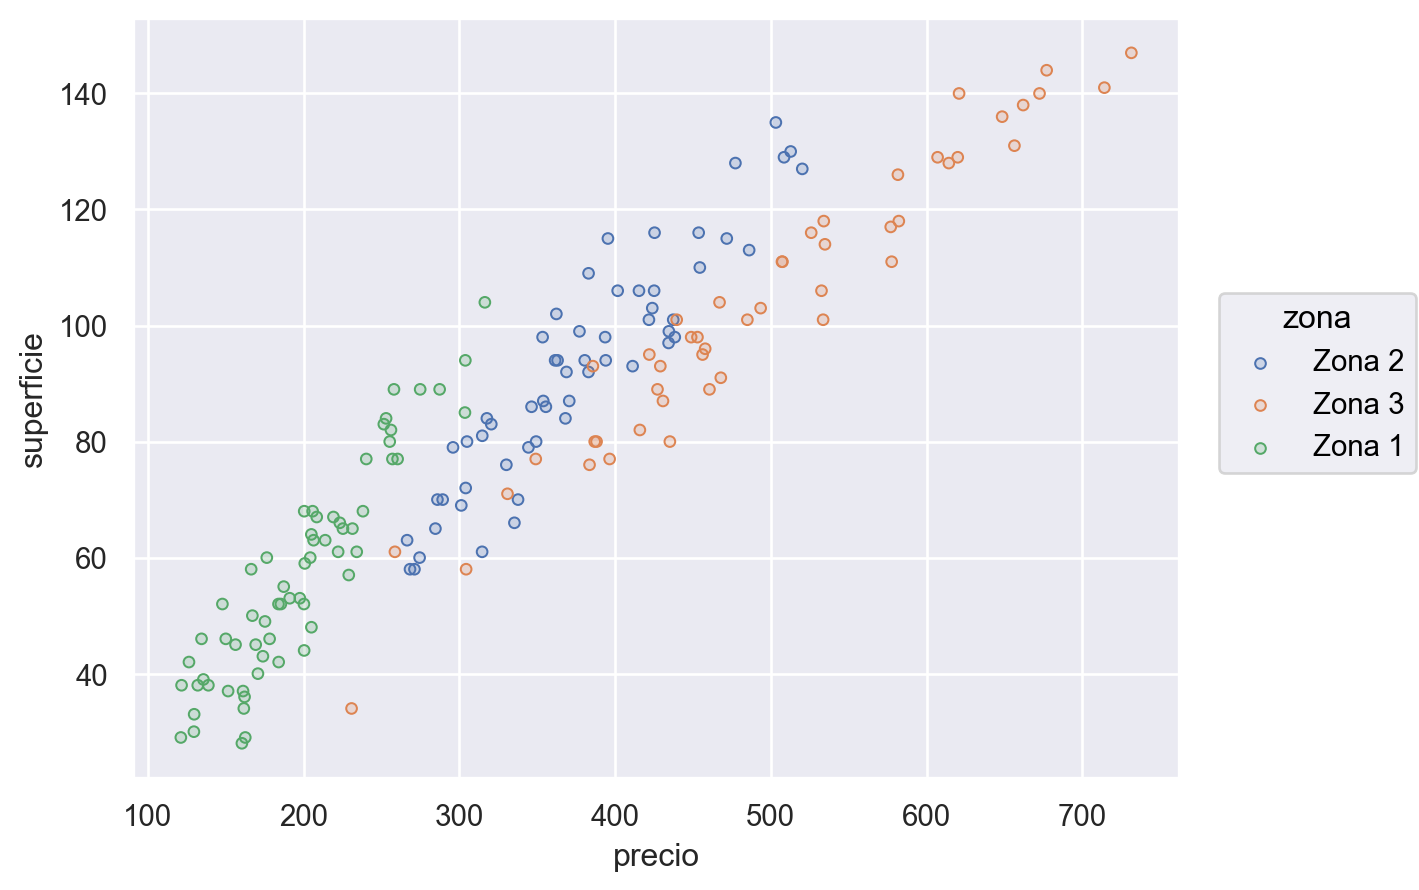

In [7]:
#2)
inmueble = pd.read_csv('inmuebles.csv')
#datos.head ()

"""a)Realizar un gráfico de dispersión (scatterplot) que muestre la relación entre la superficie y el precio de cada imueble. """

scatterSupPrecio = (so.Plot(

    inmueble , x = "precio" , y = "superficie" , color = "zona"
).add(so.Dots()))

scatterSupPrecio

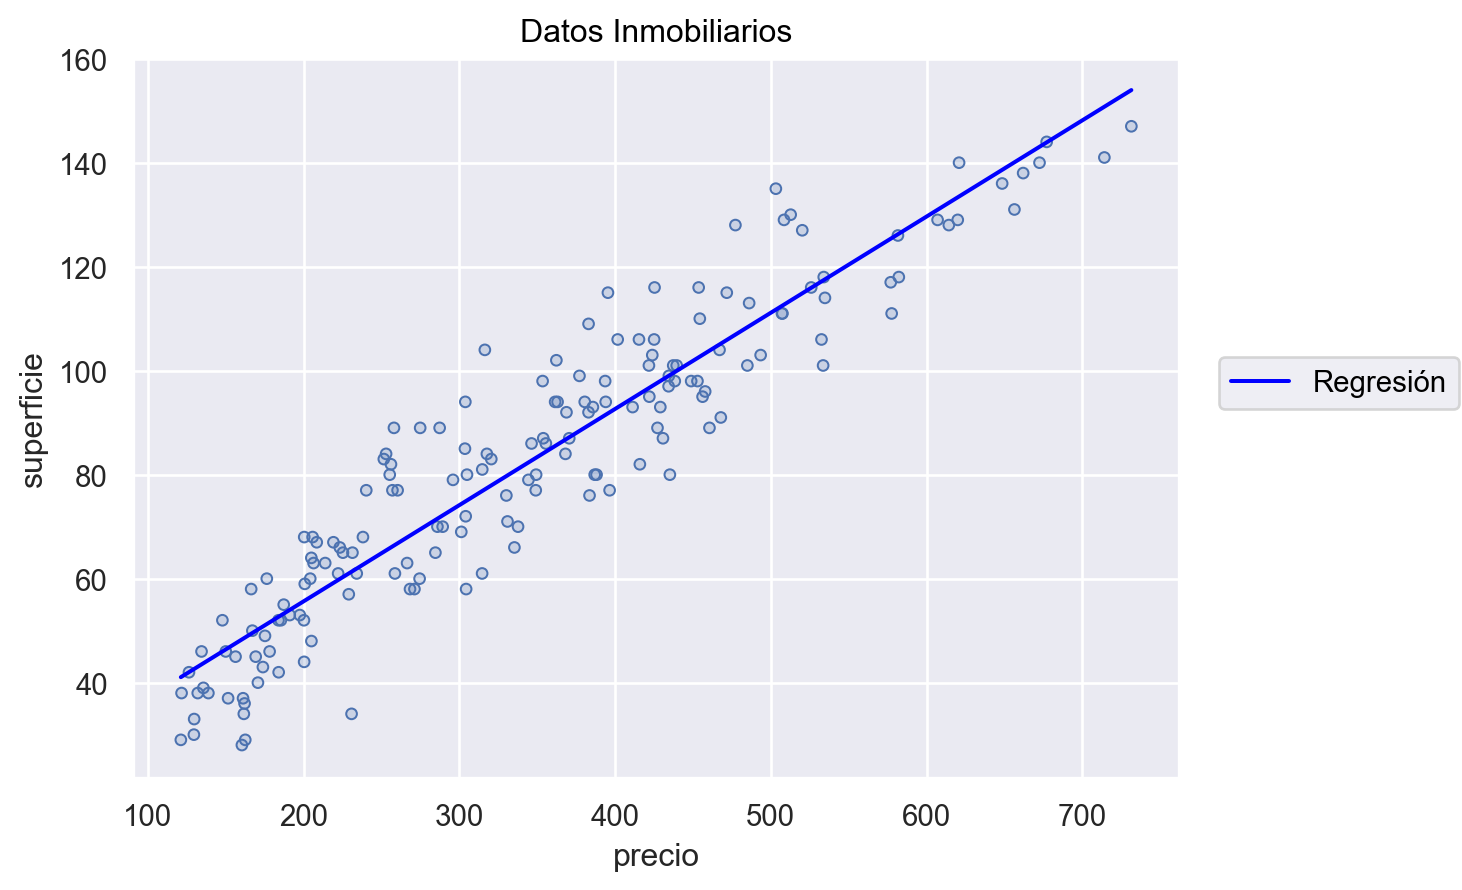

In [8]:
"""b) Realizar un gráfico de la regresión lineal entre ambas variables. El gráfico debe titularse “Datos inmobiliarios” 
y la recta de Regresión Lineal debe tener una leyenda que diga “Regresión”."""

RegresionSupPrecio = (so.Plot(

    inmueble , x = "precio" , y = "superficie" , #color = "zona"
).add(so.Dots())
.add(so.Line( color = "blue") , so.PolyFit(1) , label = "Regresión")
.label(title = "Datos Inmobiliarios"))
#OJO QUE SI DIFERENCIO POR ZONA ME HACE UNA LINEA POR CADA ZONA!!!
RegresionSupPrecio

In [9]:
"""c) Calcular los coeficientes de la recta que mejor ajusta a los datos. Según el modelo,
 ¿qué podríamos interpretar sobre el costo del metro cuadrado en la ciudad?"""

modeloI = linear_model.LinearRegression()
modeloI.fit(inmueble[["superficie"]] , inmueble[["precio"]])
beta_Uno = modeloI.coef_.item()
beta_Cero = modeloI.intercept_.item()
print (beta_Uno,beta_Cero)
 

4.73579682230239 -45.73153403092567


In [10]:
"""d) Para medir qué tan bien ajusta la recta a los datos, vamos a implementar dos funciones: una que calcule 
el error cuadrático medio (ECM) y otra que calcule el coeficiente de determinación R2."""

"""Para calcular ambas necesitamos los datos x, y y los coeficientes de la recta."""
def ecm(x, y, pendiente , o_origen):
    yPredicha = (o_origen + pendiente * x)
    RSS = (y - yPredicha)**2
    #ECM = sum(RSS) / len(y)
    ECM2 = RSS.mean()
    return ECM2

print(ecm(inmueble["precio"],inmueble["superficie"], beta_Uno , beta_Cero))

def r_cuad(x, y, pendiente , o_origen):
    yMean = y.mean()
    
    yPred = (o_origen + pendiente * x)

    vE = ((yPred - yMean)**2).sum()
    vT = ((y - yMean)**2).sum()

    return vE / vT

print(r_cuad(inmueble["precio"], inmueble["superficie"], beta_Uno,beta_Cero))

"""e) en que unidades está : al parecer no tiene unidad alguna estos valores"""

2681419.1293095583
3273.189845597673


'e) en que unidades está : al parecer no tiene unidad alguna estos valores'

In [11]:
"""f)"""
y_pred = modeloI.predict(inmueble[["precio"]]) #el valor que usamos son las x de la relacion
#display(inmueble[["precio"]])
print('El R2 es', r2_score(inmueble[["superficie"]], y_pred)) #y aca y en ecm usamos a la y de la relacion del dataframe!
print('El ECM es',mean_squared_error(inmueble[["superficie"]], y_pred))


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- precio
Feature names seen at fit time, yet now missing:
- superficie


'parece no verse algún outlier al parecer, y en cuanto al largo de las cajas, \nsi vienen es un precio más alto, en la zona 3 parece haber más variabilidad.'

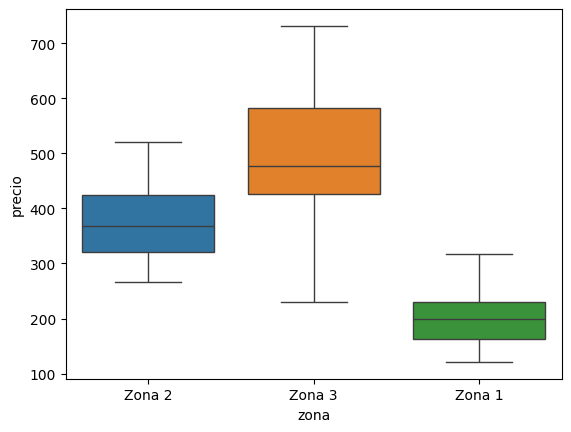

In [ ]:
"""g) Mediante la confección de un boxplot, decidir en cuál de las zonas hay mayor variabilidad de precios. ¿Hay algún outlier?"""
boxplot = (sns.boxplot( inmueble , x= "zona" , y ="precio" , hue = "zona"))
boxplot
"""parece no verse algún outlier al parecer, y en cuanto al largo de las cajas, 
si vienen es un precio más alto, en la zona 3 parece haber más variabilidad."""

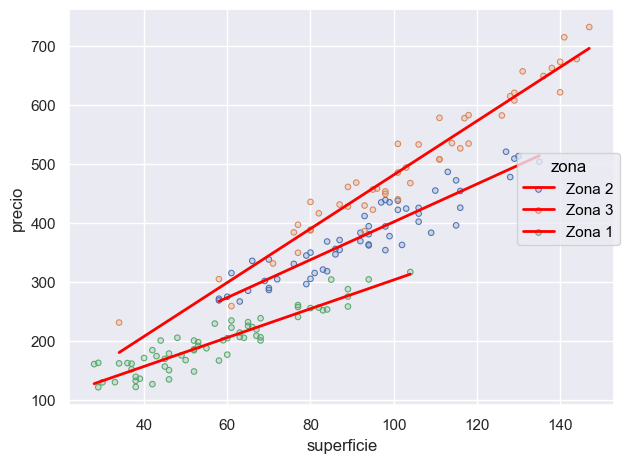

PENDIENTE ZONA 1 ES  2.442081388302122 O.O ZONA 1 ES 58.852000241172306
El R2 ZONA 1 es 0.855923919218176
El ECM ZONA 1 es 331.22746770470974
PENDIENTE ZONA 2 ES  3.206278999112207 O.O ZONA 2 ES 80.73010925558549
El R2 ZONA 2 es 0.866027281146202
El ECM ZONA 2 es 611.4955812522104
PENDIENTE ZONA 3 ES  4.560544269538954 O.O ZONA 3 ES 24.966485225784936
El R2 ZONA 3 es 0.9445652745220188
El ECM ZONA 3 es 748.8800907160429


In [15]:
"""(h) Para cada una de las zonas de la ciudad, calcular los coeficientes, el ECM y R2 de la recta que mejor aproxima a los datos."""
graficaZonas = (so.Plot(
    inmueble , x = "superficie" , y = "precio" , color = "zona")
    .add(so.Dots())
    .add(so.Line(color = "red", linewidth= 2) , so.PolyFit(1) ))
graficaZonas.show()

#se me ocurre filtrar en 3 el dataframe xd
zona1 = inmueble[inmueble["zona"] == "Zona 1"]
zona2 = inmueble[inmueble["zona"] == "Zona 2"]
zona3 = inmueble[inmueble["zona"] == "Zona 3"]
"""
#coeficientes
betasZona1 = coefs_rl(zona1["precio"],zona1["superficie"])
betasZona2 = coefs_rl(zona2["precio"],zona2["superficie"])
betasZona3 = coefs_rl(zona3["precio"],zona3["superficie"])

#ECM ZONA 1     
ECM_1 = ecm(zona1["precio"], zona1["superficie"] , betasZona1[0], betasZona1[1] )
#R**2 ZONA 1  
R2_1 = r_cuad(zona1["precio"],zona1["superficie"],betasZona1[0],betasZona1[1])

#ECM ZONA 2
ECM_2 = ecm(zona2["precio"], zona2["superficie"] , betasZona2[0], betasZona2[1] )
#R**2 ZONA 2
R2_2 = r_cuad(zona2["precio"],zona2["superficie"],betasZona2[0],betasZona2[1])

#ECM ZONA 3
ECM_3 = ecm(zona3["precio"], zona3["superficie"] , betasZona3[0], betasZona3[1] )
#R**2 ZONA 3
R2_3 = r_cuad(zona3["precio"],zona3["superficie"],betasZona3[0],betasZona3[1])
"""
#print('De la Zona 1, la pendiente y o.o son', (betasZona1[0],betasZona1[1]), 'el ECM es:', ECM_1 , 'y el R2 es' , R2_1 )
#print('De la Zona 2, la pendiente y o.o son', (betasZona2[0],betasZona2[1]), 'el ECM es:', ECM_2 , 'y el R2 es' , R2_2 )
#print('De la Zona 3, la pendiente y o.o son', (betasZona2[0],betasZona3[1]), 'el ECM es:', ECM_3 , 'y el R2 es' , R2_3 )


modeloU = linear_model.LinearRegression()
modeloU.fit(zona1[["superficie"]] , zona1[["precio"]])
beta_UNOZ1 = modeloU.coef_.item()
beta_CEROZ1 = modeloU.intercept_.item()
print ('PENDIENTE ZONA 1 ES ',beta_UNOZ1,'O.O ZONA 1 ES',beta_CEROZ1)

y_predZ1 = modeloU.predict(zona1[["superficie"]]) 
print('El R2 ZONA 1 es', r2_score(zona1[["precio"]], y_predZ1)) 
print('El ECM ZONA 1 es',mean_squared_error(zona1[["precio"]], y_predZ1))

modeloD = linear_model.LinearRegression()
modeloD.fit(zona2[["superficie"]] , zona2[["precio"]])
beta_UNOZ2 = modeloD.coef_.item()
beta_CEROZ2 = modeloD.intercept_.item()
print ('PENDIENTE ZONA 2 ES ',beta_UNOZ2,'O.O ZONA 2 ES',beta_CEROZ2)

y_predZ2 = modeloD.predict(zona2[["superficie"]]) 
print('El R2 ZONA 2 es', r2_score(zona2[["precio"]], y_predZ2)) 
print('El ECM ZONA 2 es',mean_squared_error(zona2[["precio"]], y_predZ2))

modeloT = linear_model.LinearRegression()
modeloT.fit(zona3[["superficie"]] , zona3[["precio"]])
beta_UNOZ3 = modeloT.coef_.item()
beta_CEROZ3 = modeloT.intercept_.item()
print ('PENDIENTE ZONA 3 ES ',beta_UNOZ3,'O.O ZONA 3 ES',beta_CEROZ3)

y_predZ3 = modeloT.predict(zona3[["superficie"]]) 
print('El R2 ZONA 3 es', r2_score(zona3[["precio"]], y_predZ3)) 
print('El ECM ZONA 3 es',mean_squared_error(zona3[["precio"]], y_predZ3))






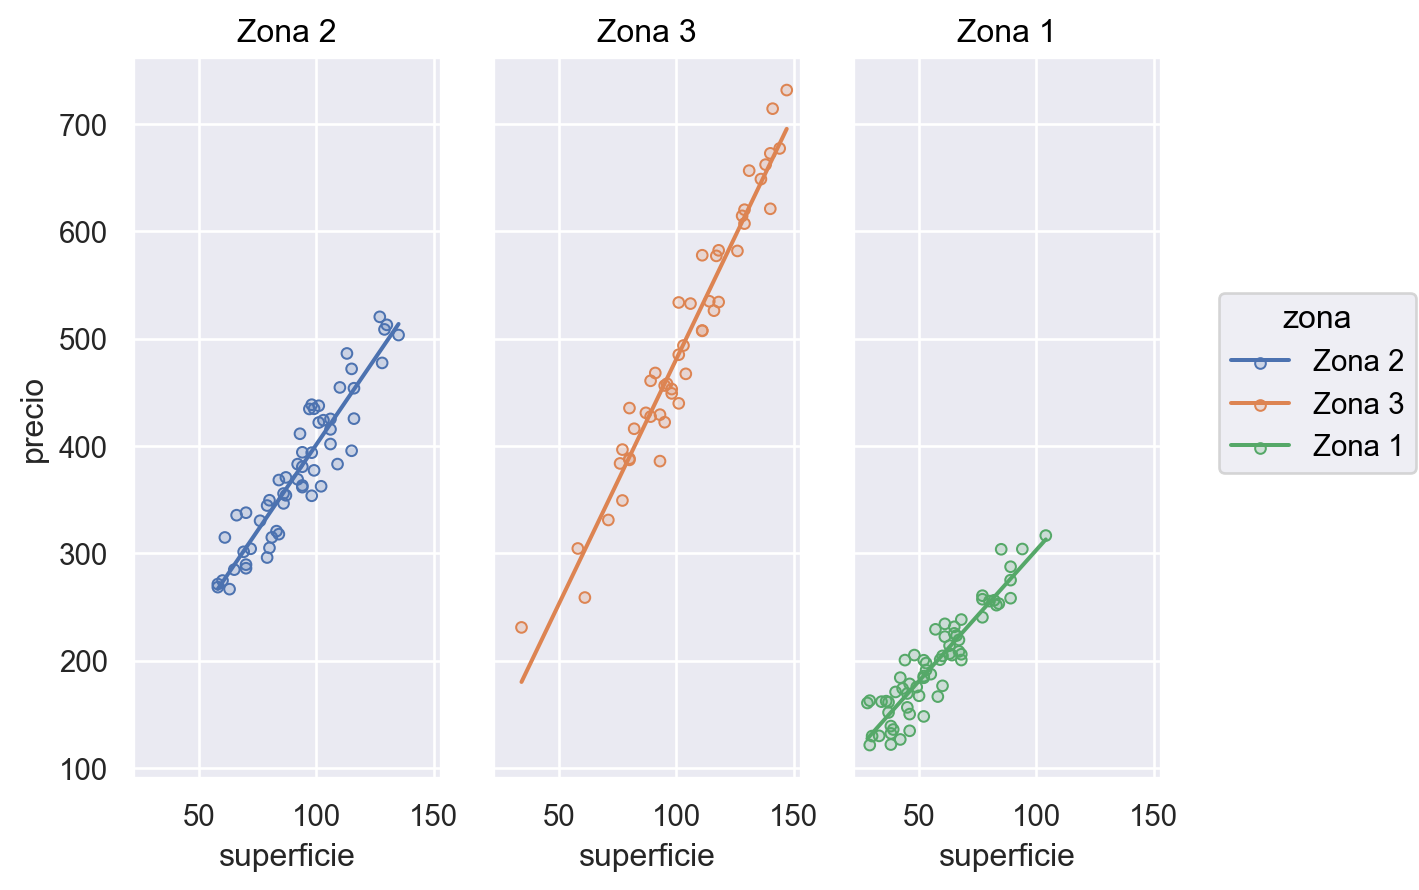

En ZONA l metro cuadrado es aprox $ 61.29408162947443
En ZONA 2, metro cuadrado es aprox $161.46021851117098
En ZONA 3, metro cuadrado es aprox $ 29.52702949532389 
el Modelo me dice que si quito el intercept (beta cero), los metros cuadrados valen la pendiente de la lineal


In [16]:
"""i) Graficar los datos y el ajuste lineal de cada zona utilizando el método facet() de Plot()
(recordar ejercicio 5.b de la práctica 3) ¿Cuál es el valor del metro cuadrado en cada zona?
¿Qué podemos concluir si comparamos estos valores con lo obtenido en el ítem c) ?"""

display(so.Plot(
    inmueble , x = "superficie" , y = "precio" , color = "zona"
                    ).add(so.Dots()).add(so.Line(), so.PolyFit(1)).facet("zona"))

print(f"En ZONA l metro cuadrado es aprox $ {beta_UNOZ1 + beta_CEROZ1}")  
print(f"En ZONA 2, metro cuadrado es aprox ${beta_CEROZ2 + beta_CEROZ2}")
print(f"En ZONA 3, metro cuadrado es aprox $ {beta_UNOZ3 + beta_CEROZ3} ")
print("el Modelo me dice que si quito el intercept (beta cero), los metros cuadrados valen la pendiente de la lineal")

c:\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Si consideramos al modelo que no discrimina por zonas, el precio de referencia serian unos [[451.52713231]]
En zona 1, [[315.27054601]]
En zona 2, [[417.38940416]] 
En zona 3, [[503.82363353]]
el modelo predice que para la zona 2 unos 100m2 deberian valer [[401.35800917]] por lo que $300 es $100 mas barato de lo estimado
4.266539806966732 3.206278999112207 72.89381076100466 80.73010925558549


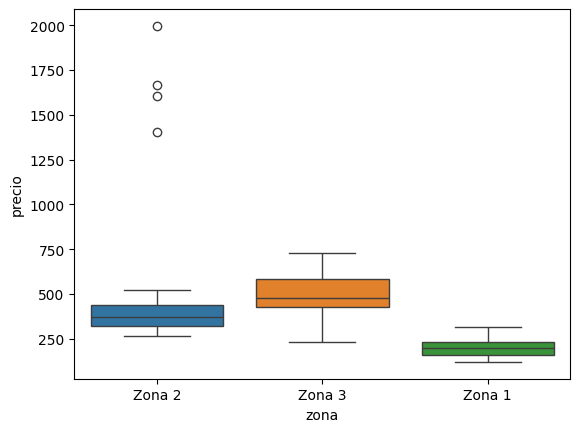

In [27]:
"""(j) Supongamos que queremos poner a la venta un inmueble de 105 m2. Sólo con esa
información y teniendo en cuenta los items anteriores, ¿cuál sería el precio de refencia
para la venta? Si sabemos además que el inmueble está en la Zona 2, ¿cambiaría en algo
el valor calculado anteriormente?"""

print(f"Si consideramos al modelo que no discrimina por zonas, el precio de referencia serian unos {modeloI.predict([[105]])}") 
print(f"En zona 1, {modeloU.predict([[105]])}")
print(f"En zona 2, {modeloD.predict([[105]])} ")
print(f"En zona 3, {modeloT.predict([[105]])}")
#varia segun las zonas claramente!

"""(k) Si me ofrecen un inmueble de 100 m2 en la Zona 2 a un precio de 300, ¿qué tan barato o
caro es respecto a su precio de referencia?"""
prediccion100m2 = modeloD.predict([[100]])
print(f"el modelo predice que para la zona 2 unos 100m2 deberian valer {prediccion100m2}", 'por lo que $300 es $100 mas barato de lo estimado')
"""
(l) Efecto de los outliers. En este item trabajaremos con los datos de inmuebles_outliers.csv,
que tiene los mismos datos que inmuebles.csv, salvo cuatro que son outliers."""

inmueblesOutliers = pd.read_csv('inmuebles_outliers.csv')

ModeloO = linear_model.LinearRegression()
ModeloO.fit(inmueblesOutliers[["superficie"]],inmueblesOutliers[["precio"]])


inmu1 = inmueblesOutliers[inmueblesOutliers["zona"] == "Zona 1"]
inmu2 = inmueblesOutliers[inmueblesOutliers["zona"] == "Zona 2"]
inmu3 = inmueblesOutliers[inmueblesOutliers["zona"] == "Zona 3"]

inmu1.head()
Mod1 = linear_model.LinearRegression()
Mod1.fit(inmu1[["superficie"]], inmu1[["precio"]])
Mod1.coef_.item()
Mod1.intercept_.item()

Mod2 = linear_model.LinearRegression()
Mod2.fit(inmu2[["superficie"]], inmu2[["precio"]])
beta1_outlierZ2 = Mod2.coef_.item()
beta0_outlierZ2 = Mod2.intercept_.item()

Mod3 = linear_model.LinearRegression()
Mod3.fit(inmu3[["superficie"]], inmu3[["precio"]])
Mod3.coef_.item()
Mod3.intercept_.item()

boxplotOutliers = sns.boxplot ( inmueblesOutliers , x= "zona" , y= "precio", hue = "zona")
boxplotOutliers

"""i. Realizar un boxplot que permita identificar en qué zona(s) se encuentran los outliers.
#estan en la zona 2!!!
ii.  Comparar los coeficientes del ajuste lineal de la(s) zona(s) afectada(s) con los obtenidos
en el ítem h)"""
#ii)
print (beta1_outlierZ2 , beta_UNOZ2, beta0_outlierZ2 , beta_CEROZ2)
#son distintos!!!

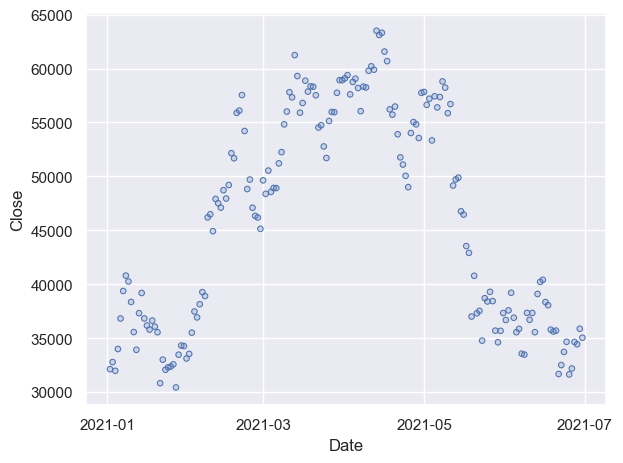

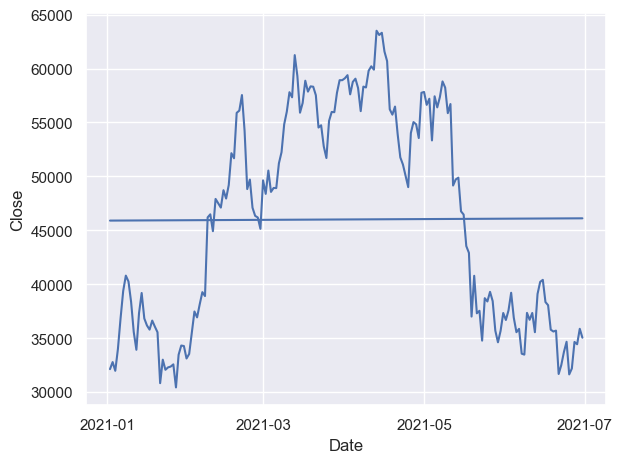

In [38]:
#3
"""En el archivo bitcoin.csv se encuentran datos de cotizacion de Bitcoin desde el 17/09/2014
hasta el 19/02/2022 1
.)Cargamos el dataset:
btc = pd.read_csv('datos/bitcoin.csv')
btc.head ()
Nos interesa analizar la evolución del precio de cierre (Close) en periodo comprendido entre el
01/01/2021 y el 01/07/2021:

# Nos aseguramos que pandas interprete la fecha correctamente
btc['Date'] = pd. to_datetime (btc['Date'], format='%Y-%m-%d')

# Filtramos el dataset en el periodo de interes
btc_2021 = btc [( btc['Date']>"2021 -01 -01") & (btc['Date']<"2021 -07 -01")]

Visualizar el ajuste lineal para los datos del dataframe btc_2021. En este caso, ¿resulta más
conveniente un scatterplot o un gráfico de lineas para los datos? ¿Te resultaría útil utilizar esta
recta para predecir el valor de BTC o para describir el cambio de su valor en este periodo?"""

btc = pd.read_csv('bitcoin.csv')
btc.head()
btc['Date'] = pd. to_datetime (btc['Date'], format='%Y-%m-%d')
btc_2021 = btc [( btc['Date']>"2021 -01 -01") & (btc['Date']<"2021 -07 -01")]

#modeloBit = linear_model.LinearRegression()
#modeloBit.fit([["Close"]])

bitcoinPlot = (so.Plot(
    btc_2021 , x = "Date" , y = "Close")
    .add(so.Dots()) #.add(so.Line())
)
bitcoinPlot.show()

bitcoinPlotL = (so.Plot(
    btc_2021 , x = "Date" , y = "Close")
    .add(so.Line())
    .add(so.Line() , so.PolyFit(1))
)

bitcoinPlotL.show()
"""literalmente la recta linea me habla del promedio de los datos de la variables, 
no se ajusta bien el modelo al comportamiento de los datos."""



In [51]:
#4
"""4. Utilizando el dataset tips de seaborn:
datos = sns. load_dataset ('tips')
realizar la Regresión Lineal donde la variable X es total_bill menos el promedio de total_bill
y la variable Y es tip. Responder las siguientes preguntas:
(a) ¿Qué interpretación se le puede dar a β0? Pista: calcular el promedio de las propinas.
"""

datos = sns.load_dataset('tips')

#display(datos["total_bill"])
media = datos["total_bill"].mean()
display(media)

modelo = linear_model.LinearRegression()
modelo.fit(datos[["total_bill"]]-media, datos[["tip"]])
display(modelo.intercept_.item())
propinas = datos["tip"].mean()
display(propinas)

modeloT = linear_model.LinearRegression()
modeloT.fit(datos[["total_bill"]], datos[["tip"]])
#display(modeloT.intercept_.item())
"""
(b) ¿Cambia el valor de β1 respecto a la Regresión Lineal de total_bill vs. tip?
 """
display(modelo.coef_.item())
display(modeloT.coef_.item())
#no cambian! son curvas ponele con misma pendiente

19.78594262295082

2.99827868852459

2.99827868852459

0.10502451738435337

0.10502451738435337

In [ ]:
#5 
"""
En este ejercicio utilizaremos el dataset healthexp de seaborn, donde se recopila cada año
(Year) lo que cada país (Country) invierte en salud por habitante (Spending_USD) y su
expectativa de vida (Life_Expectancy).
Nos enfocaremos en los datos de Japón, nuestra variable predictora será Spending_USD y la
dependiente será Life_Expectancy.
(a) Visualizar en un mismo gráfico los datos y los polinomios de grado 1, de grado 2 y de grado
3 que mejor ajustan a los datos. Añadir etiquetas que para facilitar la interpretación del
gráfico.
(b) En base al gráfico obtenido en el ítem anterior, elegir el grado que considerás que mejor
ajusta a los datos. Utilizando scikit-learn, calcular los coeficientes de ese polinomio.
(c) Calcular el R2 y el ECM.
(d) Según el polinomio obtenido en el ítem anterior, estimar cuál sería la expectativa de vida
de los habitantes de Japón si el país invirtiera U$D 5000.
(e) Visualizar el polinomio de grado 10 que mejor ajusta a los datos. ¿Se aprecia una mejora?
¿Resulta conveniente ajustar con un polinomio de grado 50?

"""